In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Generate random linear data

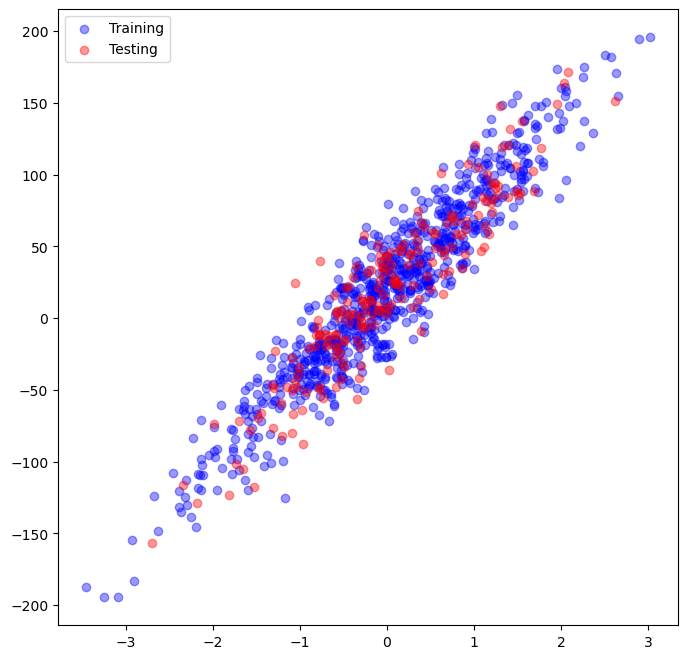

In [19]:
## Play with n and bias
n = 1000
bias = 20


X, y, w = make_regression(n_samples= n, 
                          n_features= 1, 
                          n_informative= 1, 
                          coef= True,
                          bias = bias,
                          noise = 20)

## Break into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

plt.figure(figsize= (8, 8))
plt.scatter(X_train, y_train, alpha = 0.4, c = 'b', label= 'Training');
plt.scatter(X_test, y_test, alpha = 0.4, c = 'r', label= 'Testing');
plt.legend()
plt.show()

### Add a column of preceding ones for intercept term

In [20]:
X_train1 = np.c_[np.ones(shape= (X_train.shape[0], 1)), X_train]
X_test1 = np.c_[np.ones(shape= (X_test.shape[0], 1)), X_test]

#### Original Training data

In [21]:
X_train[:5]

array([[-0.58525761],
       [-0.03499261],
       [-1.28210681],
       [-1.90465205],
       [-2.38276669]])

#### Training data with intercept (bias) term added

In [22]:
X_train1[:5]

array([[ 1.        , -0.58525761],
       [ 1.        , -0.03499261],
       [ 1.        , -1.28210681],
       [ 1.        , -1.90465205],
       [ 1.        , -2.38276669]])

### Use Gradient Descent to find best values of $\theta$

In [23]:
## Randomize initial values of theta vector
theta = np.random.rand(2, 1)

## Play with eta and iterations
## Instead of iterations, consider coding in early stopping based on train and test error
eta = 1 / (n * 50)
iterations= 1000


## Declare empty lists to monitor errors
train_error = []
test_error = []
thetas = np.array([0, theta[0][0], theta[1][0]])


for iteration in np.arange(start= 1, stop= iterations):
    gradient = X_train1.T.dot(X_train1.dot(theta) - y_train)
    theta = theta - (eta * gradient)

    train_error.append([iteration, np.sqrt(mean_squared_error(y_pred= X_train1.dot(theta), 
                                                              y_true= y_train))])
    test_error.append([iteration, np.sqrt(mean_squared_error(y_pred= X_test1.dot(theta), 
                                                             y_true= y_test))])
    thetas = np.vstack([thetas, np.array([iteration, theta[0][0], theta[1][0]])])

        
train_error = np.array(train_error)
test_error = np.array(test_error)
        
print(f'Slope\nActual: {w}  Predicted: {theta[1, 0]}\n')
print(f'Intercept\nActual: {bias}  Predicted: {theta[0, 0]}')

Slope
Actual: 58.773340530235615  Predicted: 59.58011794627699

Intercept
Actual: 20  Predicted: 19.79049837614069


## Normal Equation:  $\theta = (X^T X)^{-1} X^T y$ 

In [24]:
norm_eq_theta = np.linalg.inv(X_train1.T.dot(X_train1)).dot(X_train1.T).dot(y_train)

print(f'Slope\nActual: {w}  Predicted: {norm_eq_theta[1, 0]}')
print(f'Intercept\nActual: {bias}  Predicted: {norm_eq_theta[0, 0]}')

Slope
Actual: 58.773340530235615  Predicted: 59.58012196190407
Intercept
Actual: 20  Predicted: 19.790501298086937


## Learning Curve

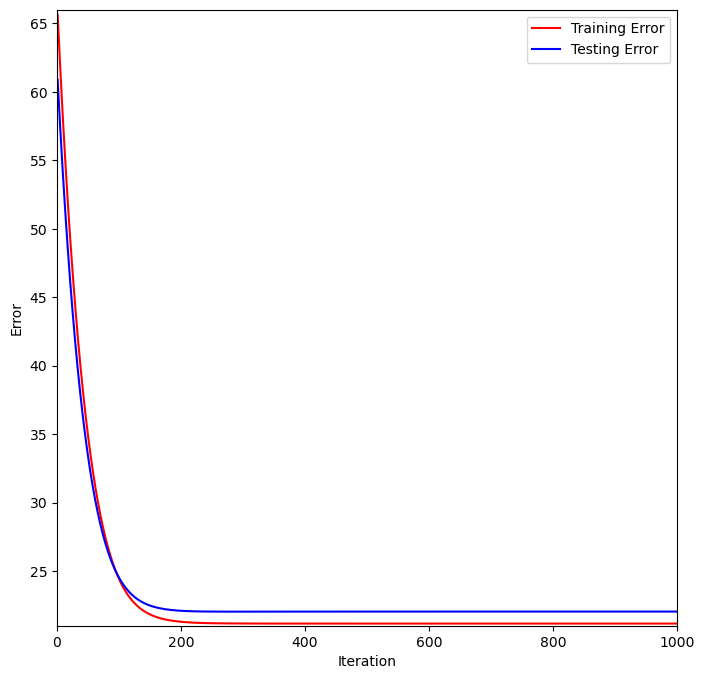

In [25]:
ymax = np.ceil(max(test_error[:, 1].max(), train_error[:, 1].max()))
ymin = np.floor(min(test_error[:, 1].min(), train_error[:, 1].min()))

plt.figure(figsize= (8, 8))
plt.plot(train_error[:, 0],
         train_error[:, 1],
         c = 'r', label= 'Training Error')
plt.plot(test_error[:, 0],
         test_error[:, 1],
         c = 'b', label= 'Testing Error')
plt.axis((0, iterations, ymin, ymax))
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.legend()
plt.show()

### Theta Values versus Iteration

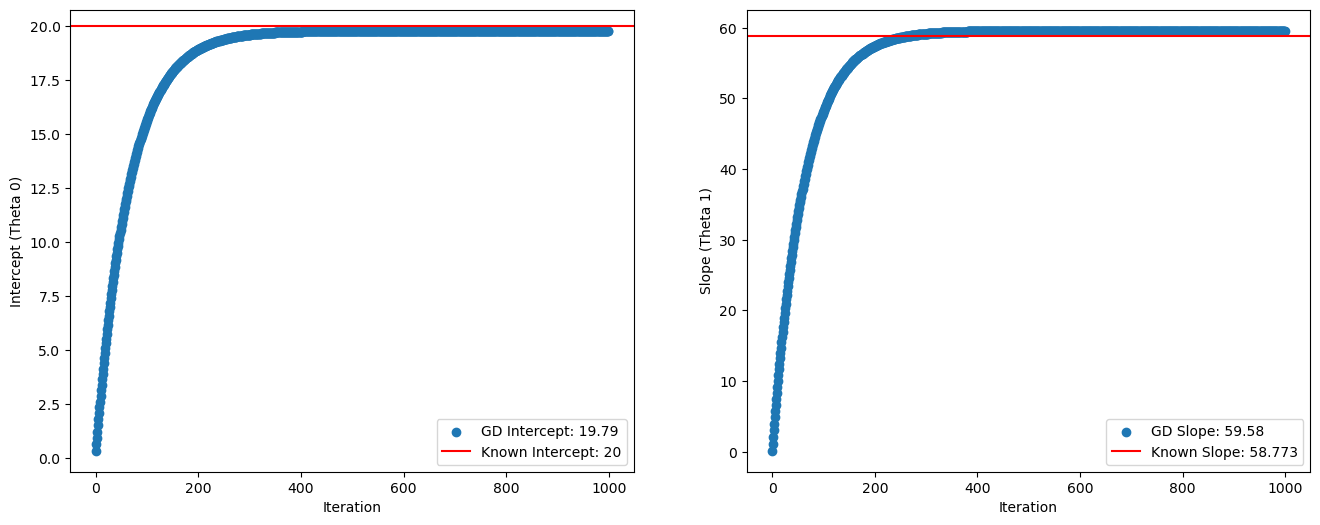

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2 , figsize= (16, 6))
ax1.scatter(thetas[:, 0], thetas[:, 1], label= f'GD Intercept: {np.round(thetas[-1, 1], 3)}')
ax1.axhline(y= bias, color= 'red', label= f'Known Intercept: {np.round(bias, 3)}')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Intercept (Theta 0)')
ax1.legend()

ax2.scatter(thetas[:, 0], thetas[:, 2], label= f'GD Slope: {np.round(thetas[-1, 2], 3)}')
ax2.axhline(y= w, color= 'red', label= f'Known Slope: {np.round(w, 3)}')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Slope (Theta 1)')
ax2.legend()
plt.show()